# NBA Game Prediction - Feature Selection and Engineering

This notebook focuses on analyzing feature importance and performing feature selection. We'll:
1. Analyze feature importance using multiple methods
2. Perform feature selection
3. Apply dimensionality reduction techniques
4. Create new features if needed

## 1. Import Libraries
Import all necessary libraries for feature selection and analysis.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
sns.set()
sns.set_palette('husl')

## 2. Load Prepared Data
Load the data we prepared in the previous step.

In [2]:
# Load the prepared data
X_train = pd.read_csv('../data/processed/X_train.csv')
X_test = pd.read_csv('../data/processed/X_test.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (1912, 20)
Testing set shape: (479, 20)


## 3. Feature Importance Analysis
Analyze feature importance using multiple methods.

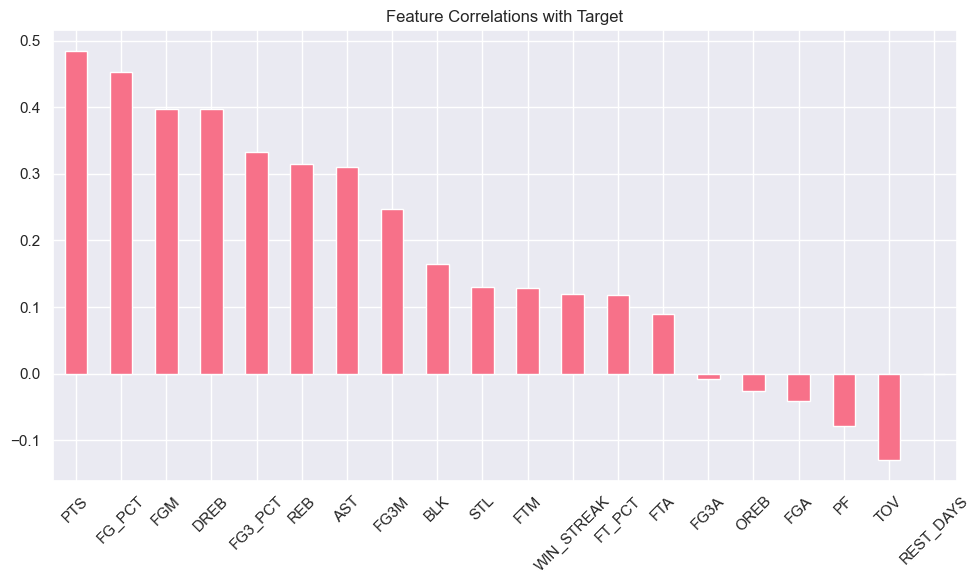

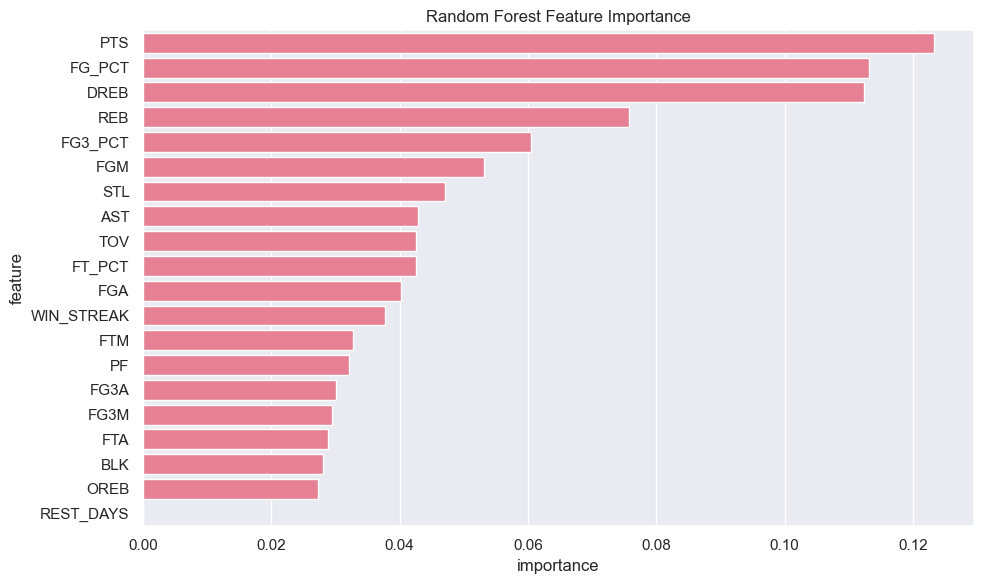

In [3]:
# 3.1 Correlation Analysis
correlations = X_train.corrwith(y_train['TARGET']).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
correlations.plot(kind='bar')
plt.title('Feature Correlations with Target')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3.2 Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train['TARGET'])

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

## 4. Feature Selection
Select the most important features using statistical tests.

In [4]:
# Select top k features using f_classif
k = 5  # Number of features to select
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train['TARGET'])
X_test_selected = selector.transform(X_test)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()].tolist()
print('Selected features:', selected_features)

# Save selected features
pd.DataFrame({'selected_features': selected_features}).to_csv(
    '../data/processed/selected_features.csv', index=False
)

Selected features: ['PTS', 'FGM', 'FG_PCT', 'FG3_PCT', 'DREB']


/opt/miniconda3/envs/nba_project/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [18] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/miniconda3/envs/nba_project/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


## 5. Dimensionality Reduction
Apply PCA to reduce dimensionality while preserving variance.

Original number of features: 20
Number of PCA components: 12
Explained variance ratio: 0.9641953441090085


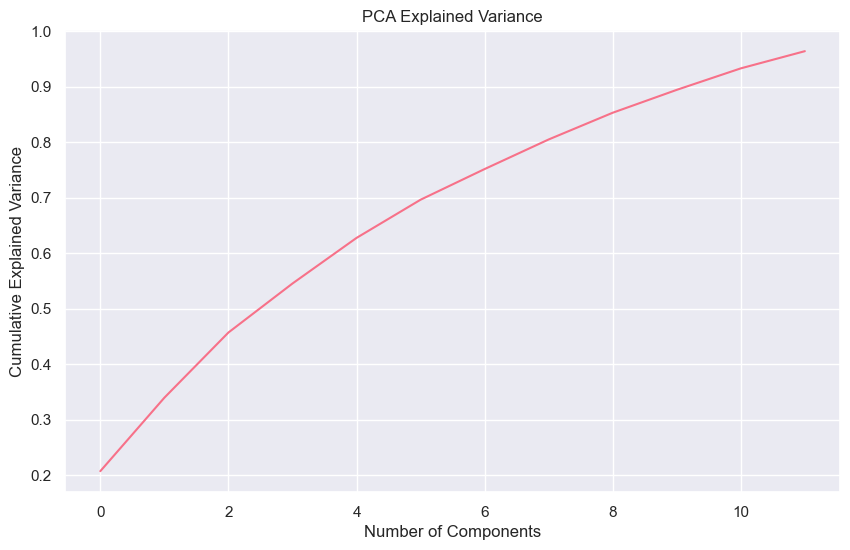

In [5]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)  # Preserve 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print('Original number of features:', X_train.shape[1])
print('Number of PCA components:', pca.n_components_)
print('Explained variance ratio:', pca.explained_variance_ratio_.sum())

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

## 6. Save Processed Data
Save the processed data for model training.

In [6]:
# Save PCA-transformed data
np.save('../data/processed/X_train_pca.npy', X_train_pca)
np.save('../data/processed/X_test_pca.npy', X_test_pca)

# Save selected features data
pd.DataFrame(X_train_selected, columns=selected_features).to_csv(
    '../data/processed/X_train_selected.csv', index=False
)
pd.DataFrame(X_test_selected, columns=selected_features).to_csv(
    '../data/processed/X_test_selected.csv', index=False
)

print('Processed data saved to ../data/processed/')

Processed data saved to ../data/processed/
